# Title: Load Prediction using Machine learning pipeline

# Table of Content

- Define Problem Statement
- Collection and importation of dataset
- Data Exploration and Analysis
- Feature Engineering 
- Feature Selection 
- Building of model
- Model Evaluation and Testing

# 1.0 Define Problem Statement

- The dataset consist of informations about the people who requested for a load, and this informations determine if a person is eligible for loan or not. The aim of this project is to analysis the taining dataset and build a model that is capable of predicting from the future dataset(test dataset) weather loan will be granted to a person or not base on his/her informations 

# 2.0 Collection and importation of dataset
- A train and test dataset was collected from kaggle.com... and I will impoert the dataset

# 2.1 Importation of dataset

In [1]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
sns.set_style("darkgrid")
plt.rcParams['figure.figsize']= 12,8

In [2]:
# importing the dataset
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
# print the first 5 row of the train_df
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# print the last 5 row of the test_df
test_df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


# Data Exploration and Analysis

- Data Exploration is the process of visualizing the information in the dataset inorder to understand the pattern and characteristics of the data

In [5]:
# print the summary of the train_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# From the result above
- The dataset consist of 13 columns and 613 rows  
- 12 of the columns are dependent features (Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History, Property_Area)  and 1 is independent feature(Loan_Status)

- 8 of the columns are of object dtype ( Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area,  Loan_Status), 4 are float Dtype( CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History) and 1 is int Dtype (ApplicantIncome).

In [6]:
# check the missing data
missing_value = train_df.isna().sum()
missing_value_per = train_df.isna().sum() / train_df.isna().count() * 100

Total_missing_values = pd.concat([missing_value, missing_value_per], axis=1, keys=["Missing_value", "%"])
Total_missing_values = Total_missing_values[Total_missing_values["%"]>0]
Total_missing_values

,Missing_value,%
Gender,13,2.117264
Married,3,0.488599
Dependents,15,2.442997
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Loan_Amount_Term,14,2.280130
Credit_History,50,8.143322


<AxesSubplot:>

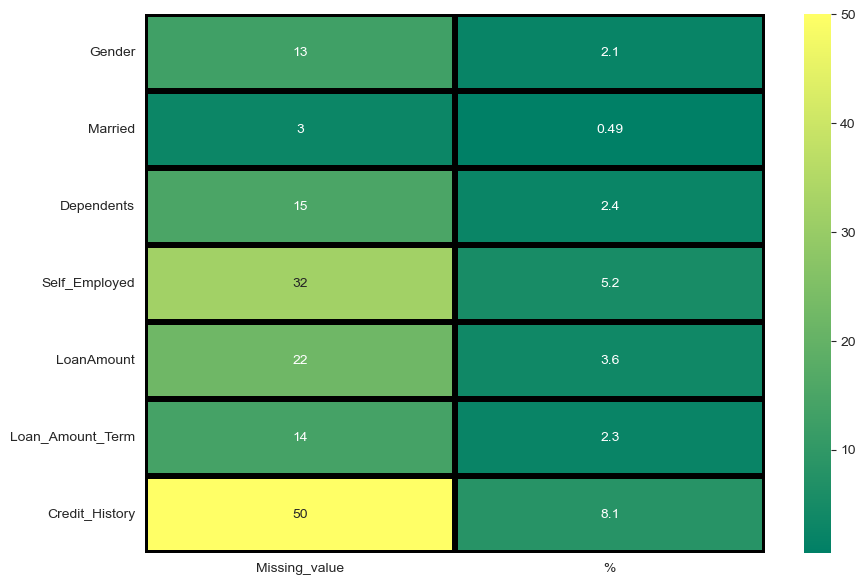

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(data=Total_missing_values, annot=True, cmap="summer", linewidths=2.9, linecolor="black")

- We have about 8 columns with missing values. I will deal with them later on in the project

# 3.1 Univariate Analysis

In [8]:
# define a function to  plot a barplot for object dtype univariate analysis
def barplot(feature):
    sns.barplot(data=train_df, x=train_df[feature].value_counts().index, y=train_df[feature].value_counts(), 
                palette=["#304D63", "#ED8975"]).set_title(feature)
    plt.show()

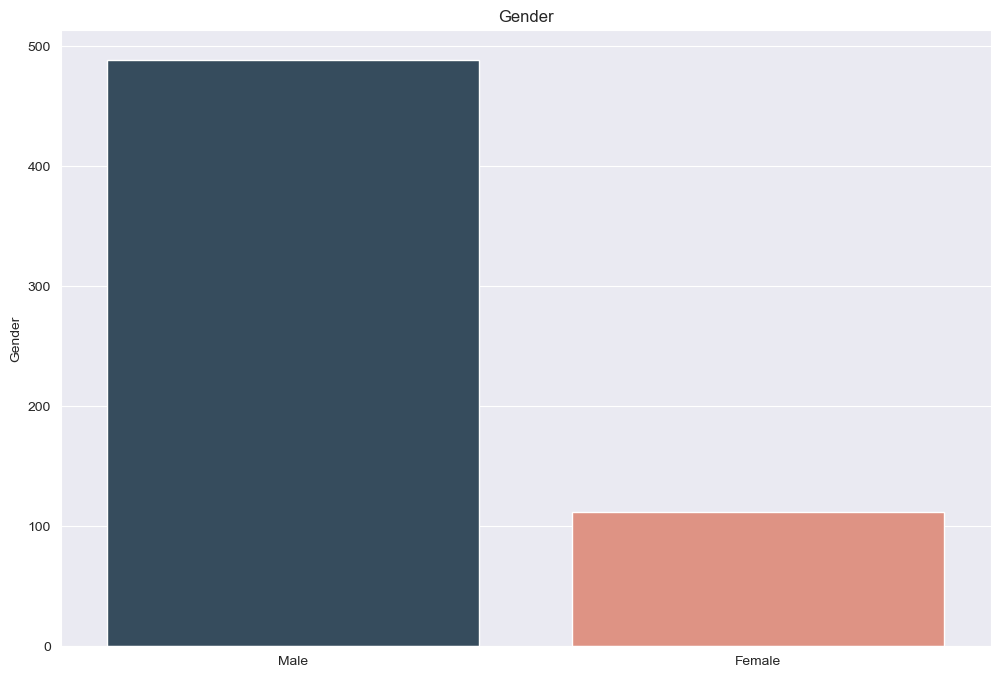

In [9]:
# barplot for Gender
barplot("Gender")

# The plot above shows that:

- There are 489(~80.0%) total number of Male who applied for the Load.
- And  122(~20.0%) total number of Female applied for the Load.

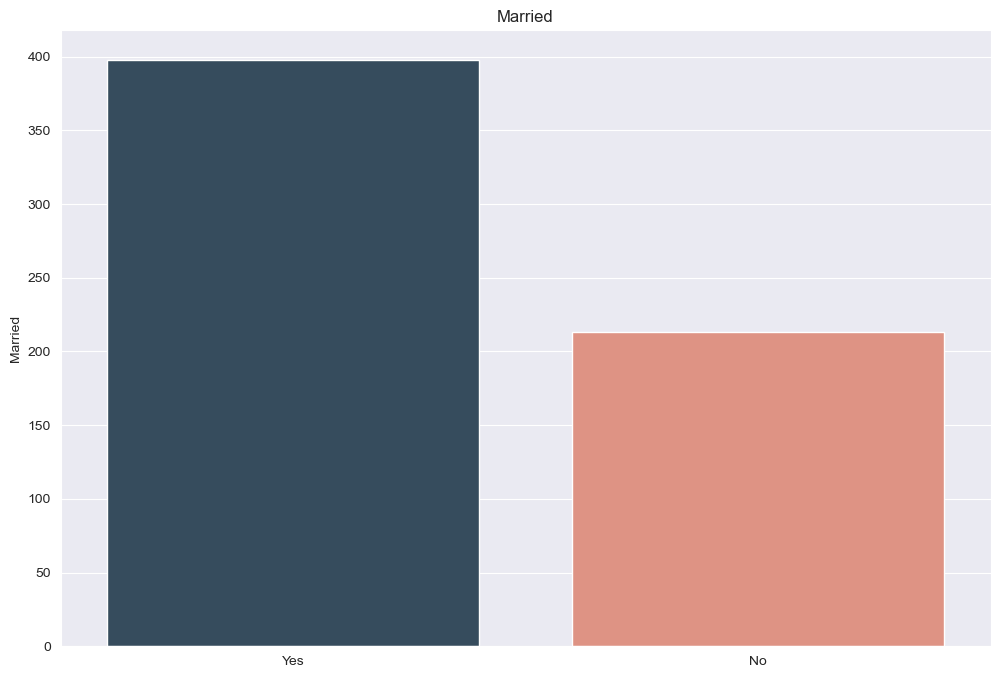

In [10]:
# barplot for Married
barplot("Married")

# The plot above show that

- 398(~65.1%) total Number of people who applied for the Load are Married
- 213 total(34.9%) Number of people who applied for the Load are Single 

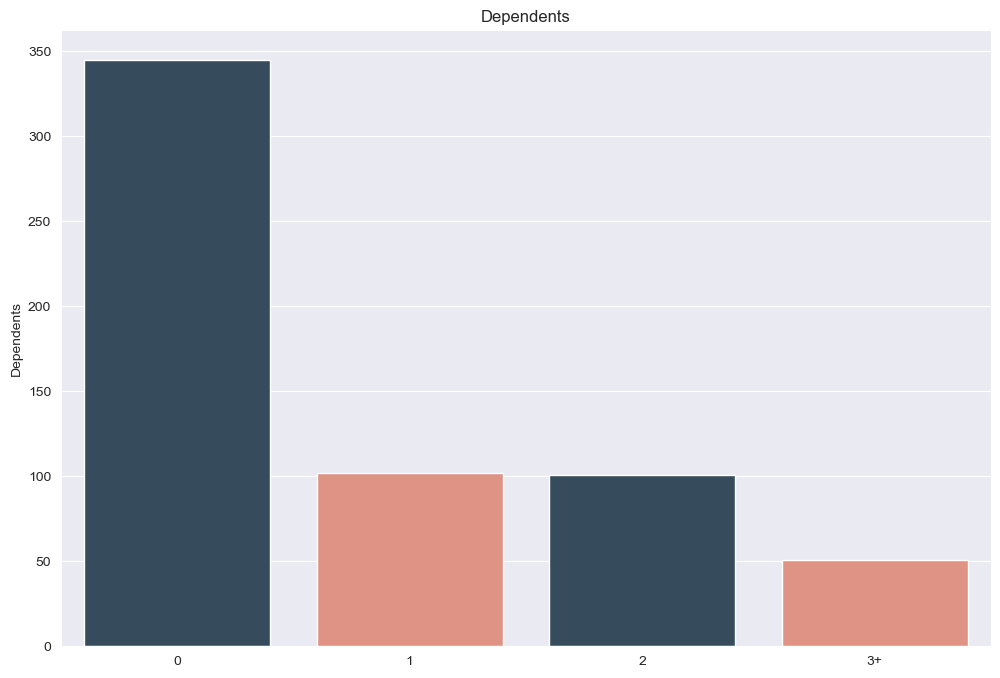

In [11]:
barplot("Dependents")

# The plot above show that:
- 345(~57.6%) total Number of people who applied for the Load has No Dependents
- 102(~17.0%) total Number of the people who applied for the Load has  1 Dependents
- 101(~16.9%) total Number of the people who applied for the Load has 2 Dependents
- 51(~8.5%) total Number of the people who applied for the Load has more than 2 Dependents

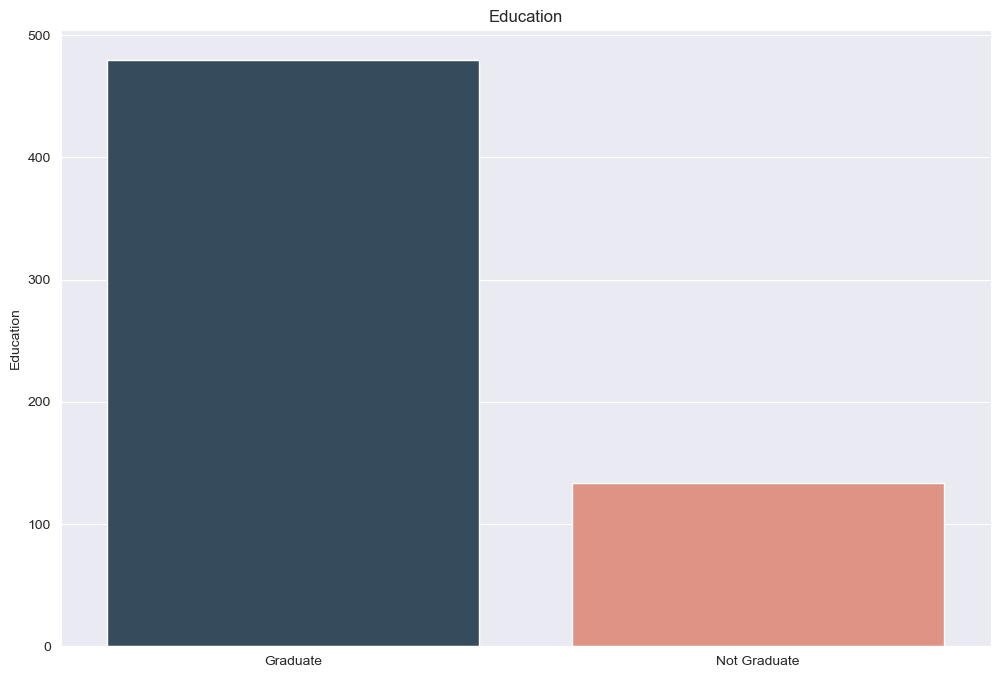

In [12]:
barplot("Education")

# The plot above show that:

- 480(~78.2%) total Number of people who applied for the Load are Graduate
- 134(~21.8%) total Number of people who applied for the Load are Not Graduate


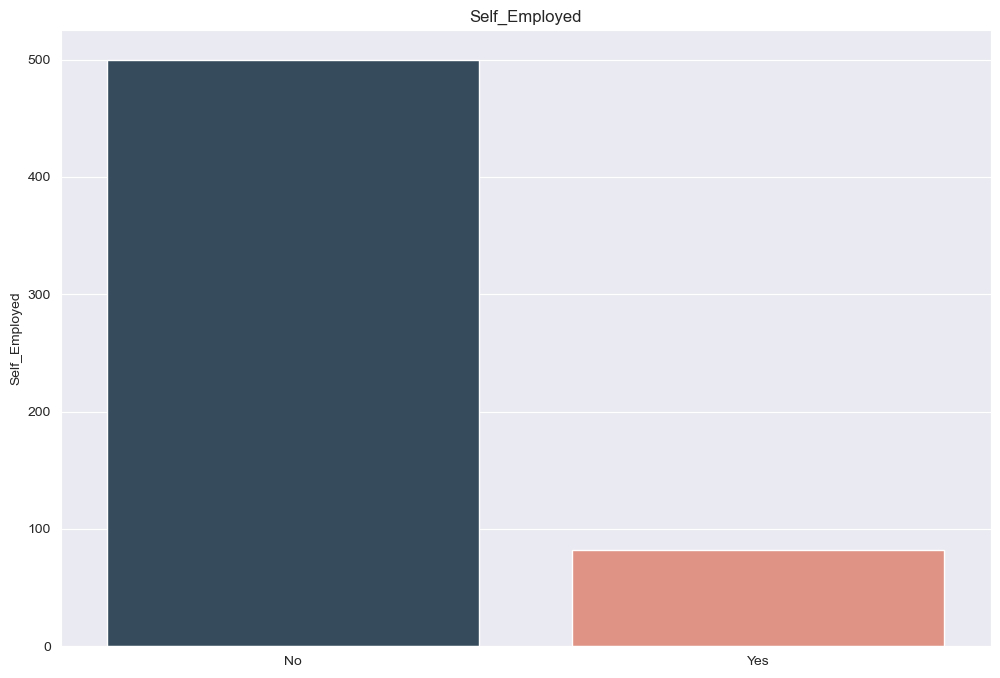

In [13]:
barplot("Self_Employed")

# The plot above show that:
- 500(~85.9%) total number of people who applied for the Load are Self_Employed
- 82(~14.1%) total number of people who applied for the Load are not Self_Employed

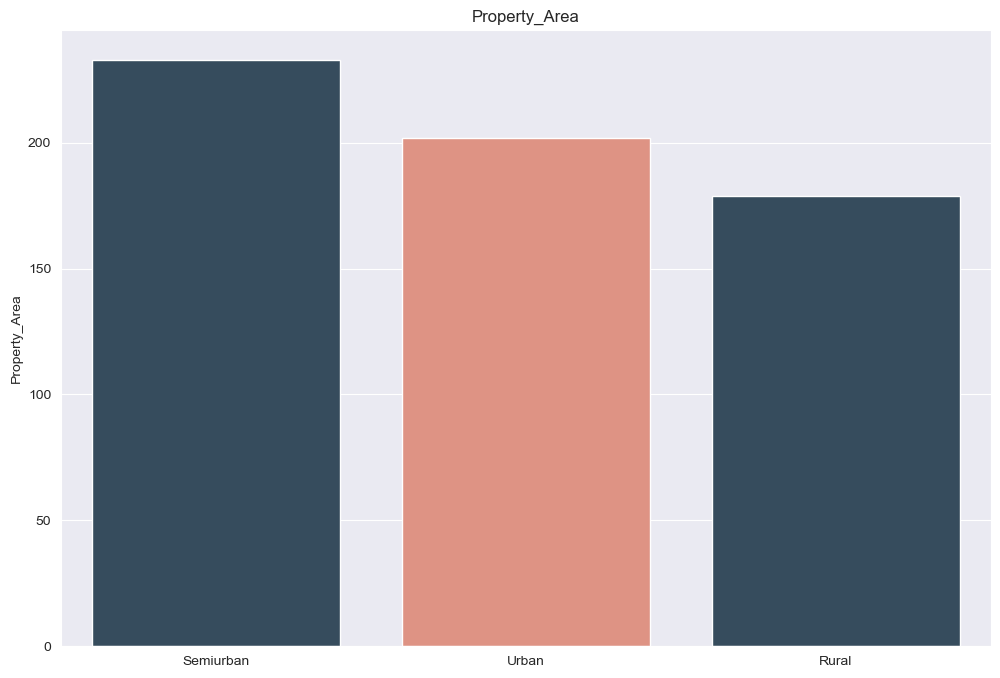

In [14]:
barplot("Property_Area")

# The plot above show that:
- 233(~38.0%) total number of people who applied for the Load has a property in semiurban area

- 202(~32.9%) total number of people who applied for the Load has a property in urban area

- 179(~29.1%) total number of people who applied for the Load has a property in Rural area

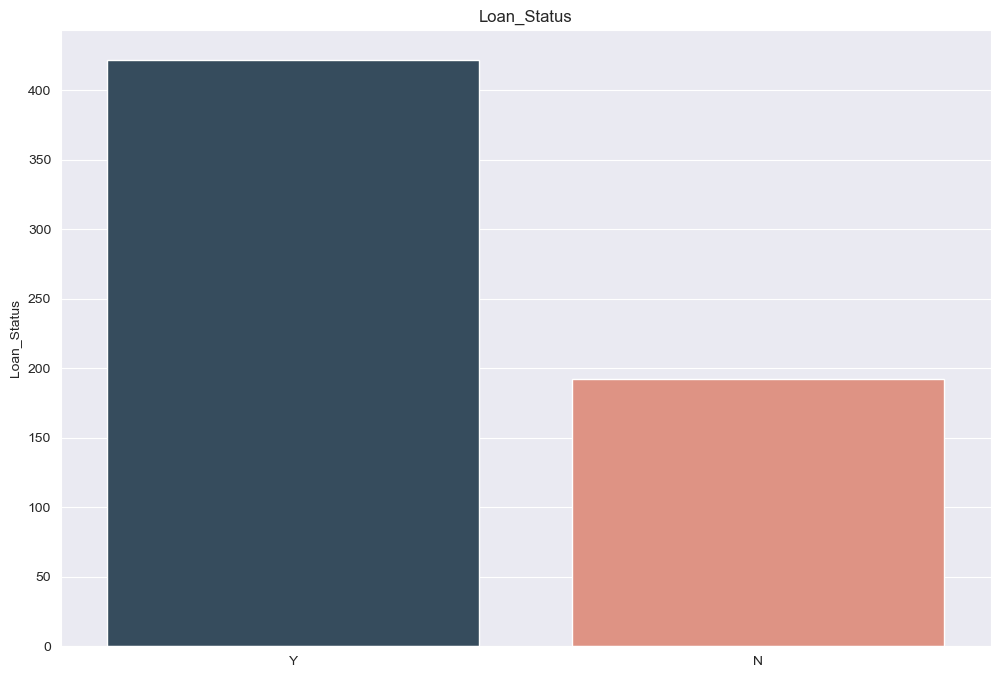

In [15]:
barplot("Loan_Status")

The plot above show that:
- The total number of 422(68.7%) Load was Granted
- The total number of 192(31.3%) Load was decline


# Bivariate Analysis

In [16]:
def stack_plot(feature):   
    YES=train_df[train_df["Loan_Status"]=="Y"][feature].value_counts()
    NO=train_df[train_df["Loan_Status"]=="N"][feature].value_counts()
    info = pd.DataFrame([YES, NO], index=["YES", "NO"])
    info.plot(kind="bar", stacked=True,figsize =(12,5))
    

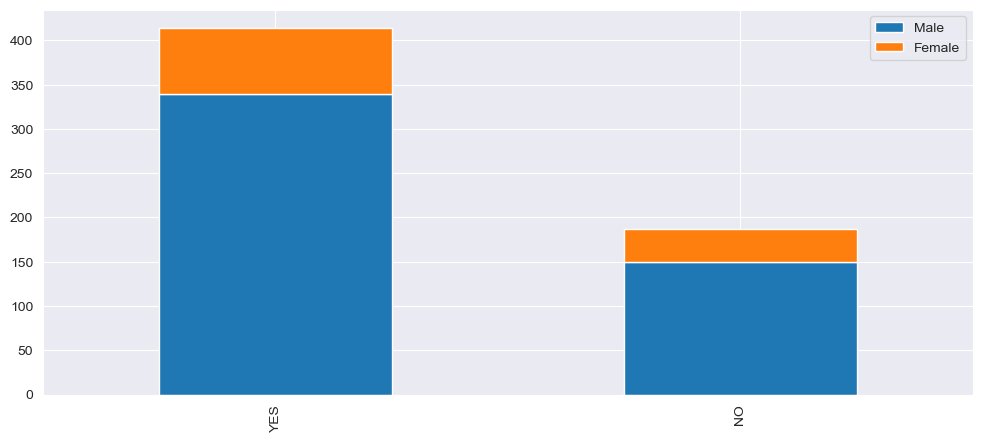

In [17]:
stack_plot("Gender")

from the plot above:
- 69.3% of  the  male who applied for the load were granted
- 61.4% of the female that applied for the load were granted


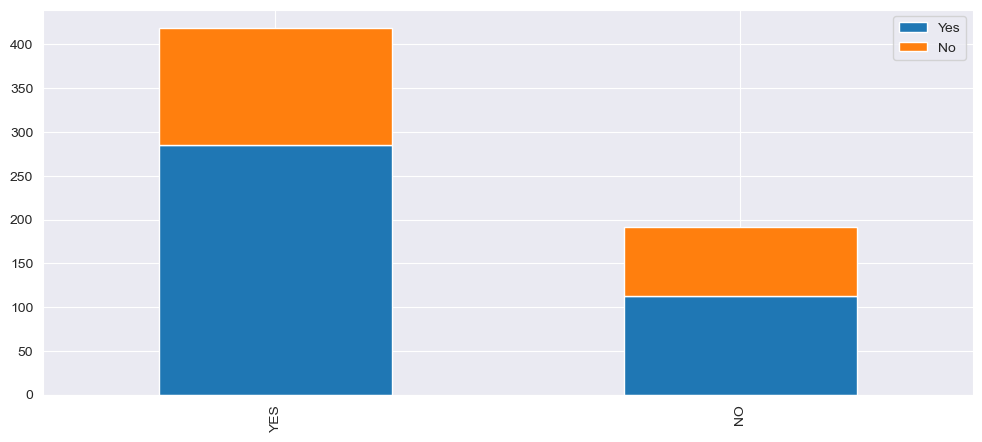

In [18]:
stack_plot("Married")

- 71.6% of married applicant were granted the load
- 62.9% of not married applicant were granted the load

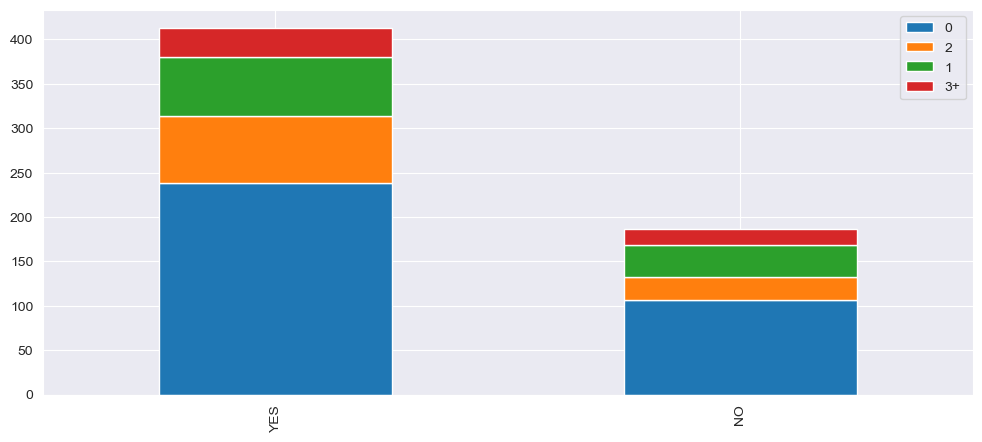

In [19]:
stack_plot("Dependents")

- 68.9% of applicant with no dependent were granted the load
- 64.7% of applicant with 1 dependent were grnted the load
- 75% of applicant with 2 dependent were granted the load
- 64.7% of applicant with more than 2 dependent were granted the load

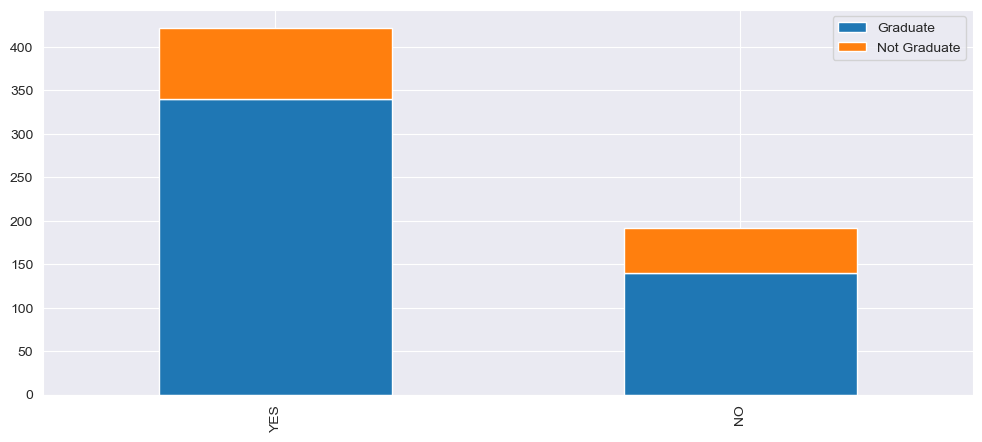

In [20]:
stack_plot("Education")

- 70.8% of Grduate who applied for the load were granted
- 61.2% of not Grduate applicant were given the load

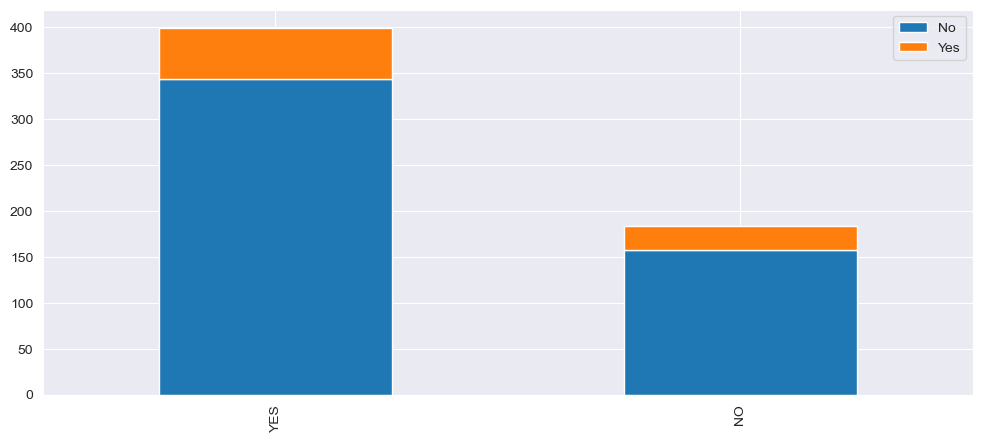

In [21]:
stack_plot("Self_Employed")

- 68.6% of not self_employed were granted the load
- 68.3% of applicant who are self_employed were given the load

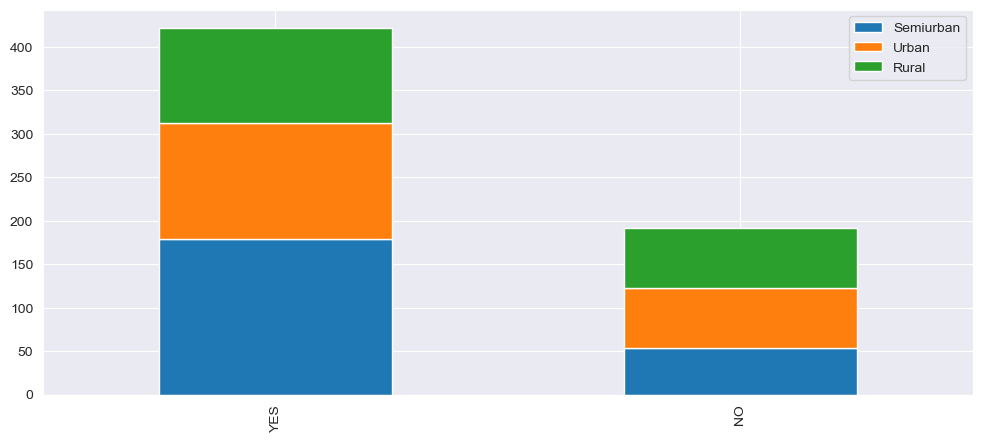

In [22]:
stack_plot("Property_Area")

- 76.8% of applicant who has property in semiurban area were granted the load
- 65.8% of applicant who has property in urban area were granted the load
- 61.5% of applicant who has property in Rural area were granted the load

(1.0, 3000.0)

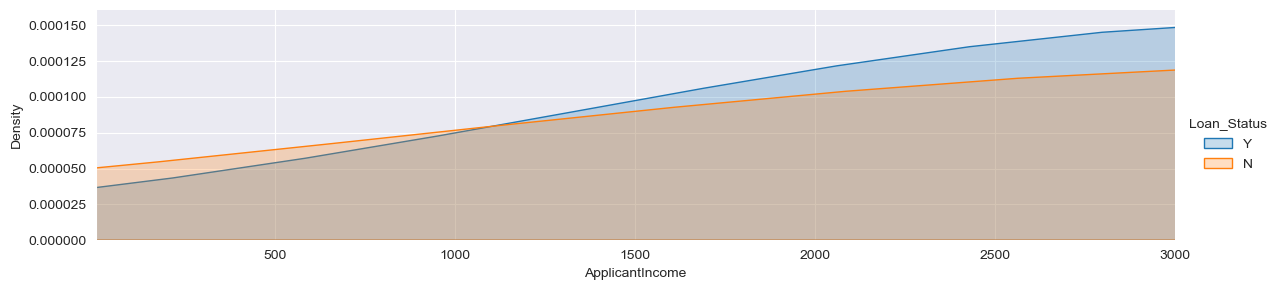

In [23]:
facet =sns.FacetGrid(train_df,hue="Loan_Status",aspect=4)
facet.map(sns.kdeplot, "ApplicantIncome",shade=True )
#facet.set(xlim=(0, train_df["ApplicantIncome"].max()))
facet.add_legend()
plt.xlim(1,3000)

In [24]:
train_df["ApplicantIncome"].max()

81000

The above plot show the relationship between Loan_status and the ApplicantIncome. From the plot it can be see that applicant with lower imcome were not granted while applicant with high income were granted

# MultiVariate analysis

In [25]:
pd.pivot_table(train_df, values=("Loan_Status"), columns=("Property_Area"), index="Dependents", aggfunc="count")

Property_Area,Rural,Semiurban,Urban
Dependents,,,
0,109,130,106
1,21,40,41
2,29,37,35
3+,18,20,13


The table above show  number of applicants(with their dependent and property area) who applied for the load

- It can be say that applicants from Semiurban area with no dependent has highest application for the load
- And applicants from urban area with more than 3 dependent has lowest application for the load

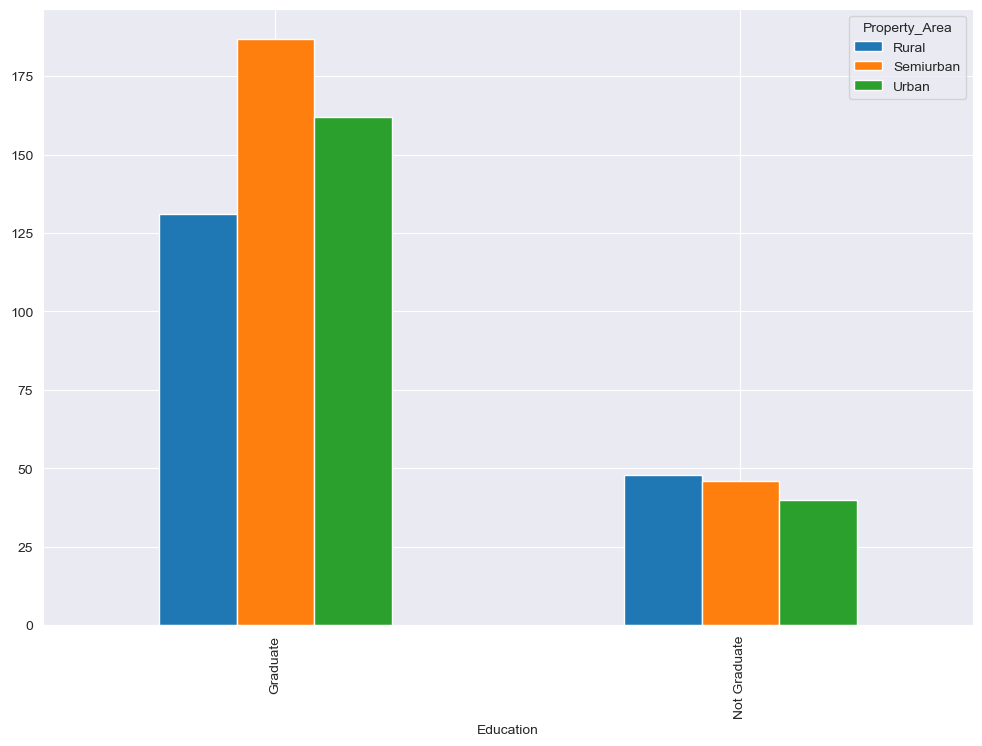

Property_Area,Rural,Semiurban,Urban
Education,,,
Graduate,131,187,162
Not Graduate,48,46,40


In [26]:
analysis2=pd.pivot_table(train_df, values=("Loan_Status"), columns=("Property_Area"), index="Education", aggfunc="count")
analysis2.plot(kind="bar")
plt.show()
analysis2

Married,No,Yes
Education,,
Graduate,168,309
Not Graduate,45,89


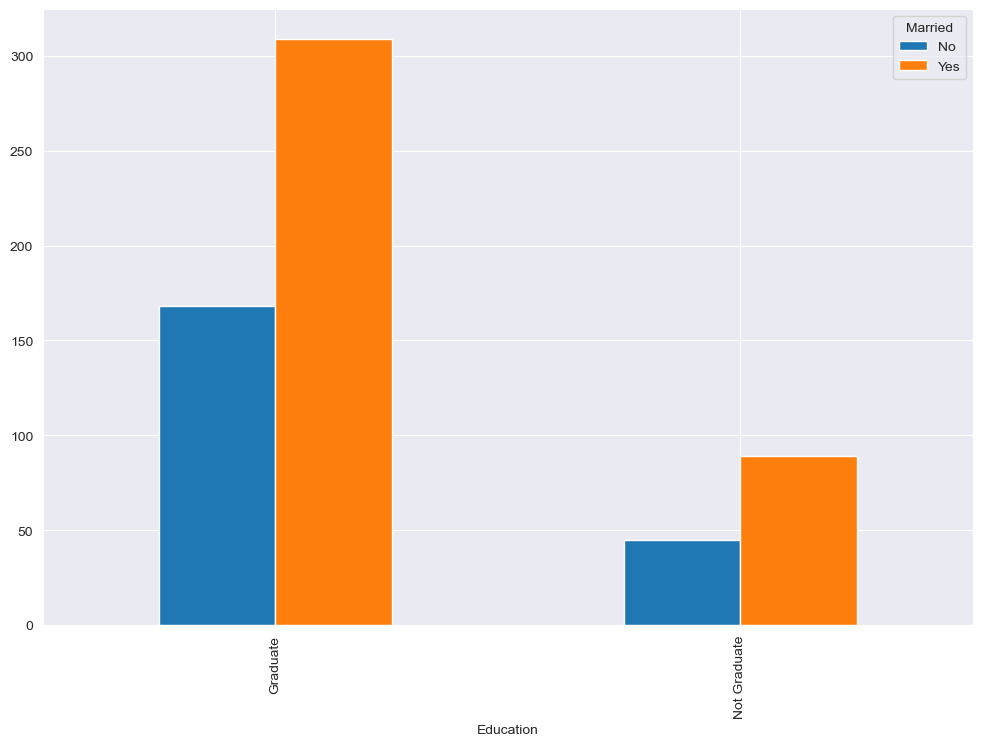

In [27]:
analysis3=pd.pivot_table(train_df, values=("Loan_Status"), columns=("Married"), index="Education", aggfunc="count")
display(analysis3)

analysis3.plot(kind="bar")
plt.show()

,Y,N
index1,85,51
index2,188,62
index3,22,13
index4,6,4


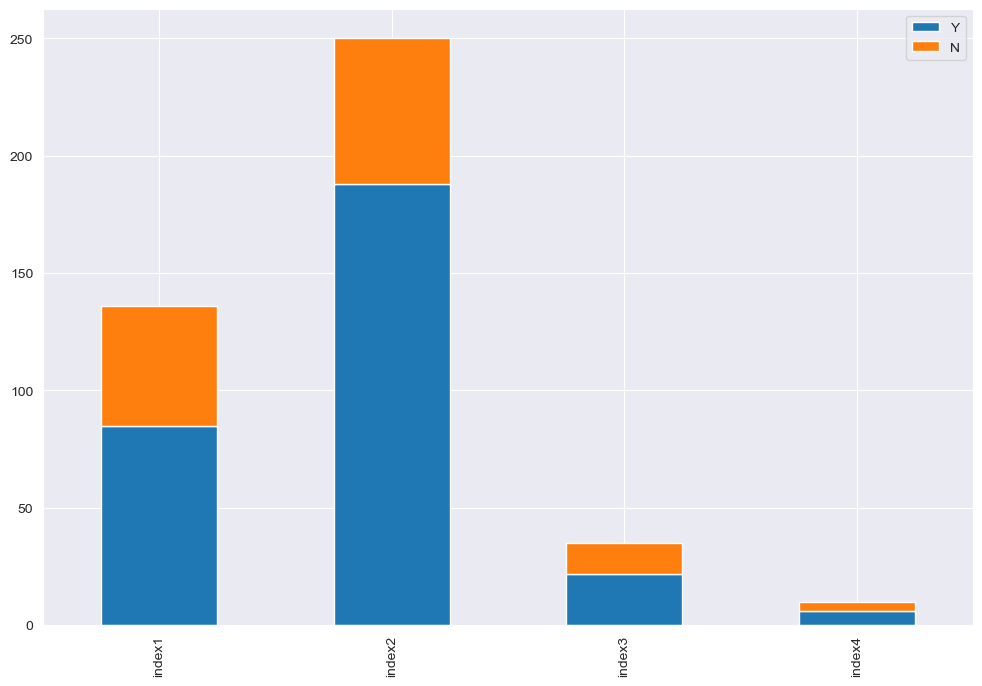

In [28]:
a=train_df.query("Education=='Graduate' and Married=='No' & Self_Employed=='No'")["Loan_Status"].value_counts()
b=train_df.query("Education=='Graduate' and Married=='Yes' & Self_Employed=='No'")["Loan_Status"].value_counts()
c=train_df.query("Education=='Not Graduate' and Married=='No' & Self_Employed=='No'")["Loan_Status"].value_counts()
d=train_df.query("Education=='Not Graduate' and Married=='Yes' & Self_Employed=='Yes'")["Loan_Status"].value_counts()
analysis4=pd.DataFrame([a,b,c,d], index=["index1","index2","index3","index4"])
display(analysis4)
analysis4.plot(kind="bar", stacked=True) 
plt.show()

- index 1: indicate the load_status of applicant who  is a Graduate, Not Self_Employed and Not Married
- index 2: indicate the load_status of applicant who is a Graduate, Not Self_Employed and has Married
- index 3: indicate the load_status of applicant who  is not a Graduate, Not Self_Employed and Not Married
- index 4: indicate the load_status of applicant who  is not a Graduate, Self_Employed and has Married
# From the analysis above, it can be say that applicant who is a Graduate, Not Self_Employed and has Married have the high probabilty of getting the load